## Quantum Illumination Experiment 3

__Error probabilities with respect to average photon numbers.__

- Author: L. Fan
- Created Date: 2017-09-19
- The Second Latest Modified: 2017-11-16
- The Latest Modified: 2017-11-19

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
from matplotlib import rc
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14) 
np.set_printoptions(threshold='nan', precision=6, suppress=True)
%matplotlib inline

In [7]:
df1 = pd.read_csv('../output/expr_3_lmd_p101.csv', comment='#')

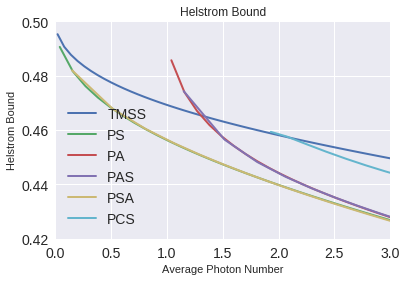

In [15]:
for name in ('TMSS', 'PS', 'PA', 'PAS', 'PSA', 'PCS'):
    temp_df = df1[df1['State'] == name]
    plt.plot(temp_df['Aver_N'], temp_df['Helstrom_Bound'], 
             lw=2, label=name)
plt.xlim(0, 3)
plt.ylim(0.42, 0.5)
plt.legend(loc=3, fontsize=14)
plt.xlabel("Average Photon Number")
plt.ylabel("Helstrom Bound")
plt.title("Helstrom Bound")
plt.show()

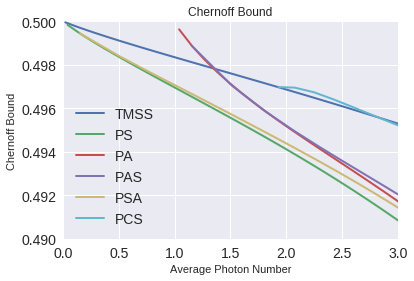

In [14]:
for name in ('TMSS', 'PS', 'PA', 'PAS', 'PSA', 'PCS'):
    temp_df = df1[df1['State'] == name]
    plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'], 
             lw=2, label=name)
plt.xlim(0, 3)
plt.ylim(0.49, 0.5)
plt.legend(fontsize=14)
plt.xlabel("Average Photon Number")
plt.ylabel("Chernoff Bound")
plt.title("Chernoff Boun")
plt.show()